In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [23]:
file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [24]:
df['Por'].shape

(200,)

In [25]:
X = df['Por'].values.reshape(-1,1) # it used to convert the dimension 
y = df['Prod'].values

In [26]:
X.shape

(200, 1)

In [27]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [28]:
pred = lr.predict(X)

In [30]:
r2 = lr.score(X,y)
r2

0.7428880535051593

In [31]:
def get_xy_mean_value(c_id1,c_id2):
    global X, Y, x_mean, y_mean, n
    X = df[c_id1].values
    Y = df[c_id2].values
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    n = len(X)
    #return X, Y, x_mean, y_mean, n
get_xy_mean_value('Por','Prod')

In [32]:
def get_Slope_y_intercept_value(xmean,ymean):
    numer = 0
    denom = 0 
    global m, c, y_intercept, x
    for i in range(n):
        """formule of slope =(x-x')*(y-y')/(x-x')^2"""
        numer += (X[i] - xmean) * (Y[i] - ymean)
        denom += (X[i] - xmean) ** 2
    m = numer/denom
    print("this is slope:",m)
    c = ymean - m*xmean
    print("this is y_intercept:",c)
    y_intercept = m*xmean + c
    print("this is value of Y coordinate:",y_intercept)
    x = (ymean - c)/m
    print("this is value of X coordinate:",x)
    #return m,c,y,x
get_Slope_y_intercept_value(x_mean,y_mean)

this is slope: 287.7807428498624
this is y_intercept: -2.944431053714652
this is value of Y coordinate: 4311.21985212
this is value of X coordinate: 14.99115


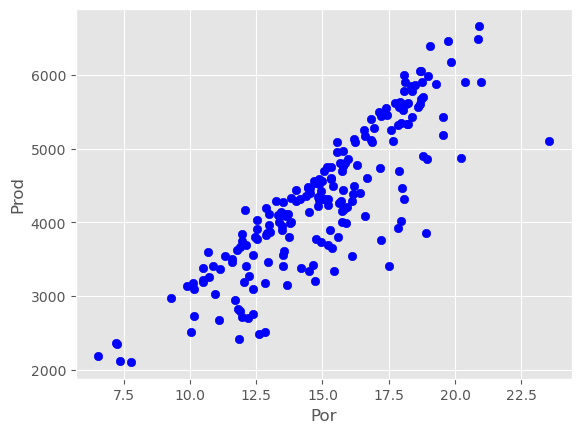

In [37]:
def get_plt_scatter(col_id1, col_id2):
    plt.scatter(df[col_id1],df[col_id2],color='blue',label='scatter')
    plt.xlabel(col_id1)
    plt.ylabel(col_id2)
    plt.show()
get_plt_scatter('Por','Prod')

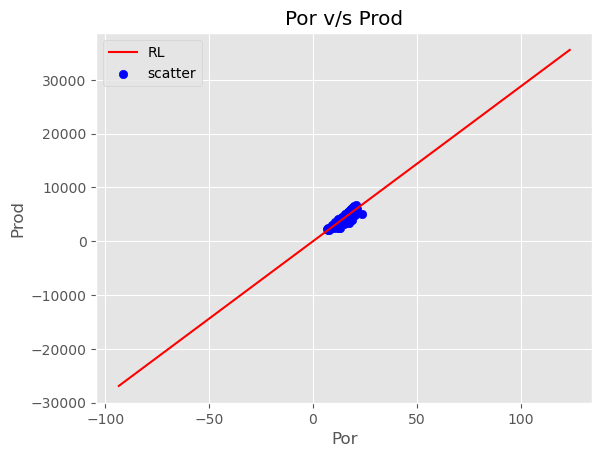

In [38]:
def get_linear_line(xlbl,ylbl,title):
    x_max = np.max(X)+100
    x_min = np.min(X)-100
    #calculatING the line value of x and y 
    #x_max is starting point and x_min is ending point number of items = 1000 or 100 or 50
    x = np.linspace(x_max, x_min, 1000)
    y_intercept = m*x + c 
    #this is for line
    plt.plot(x,y_intercept,color='red', label="RL")
    plt.scatter(X,Y,color='blue',label='scatter')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)
    plt.legend()
    plt.show()
get_linear_line('Por','Prod',title='Por v/s Prod')

In [42]:
def get_r_square():
    global X_re,Y_pred
    #it is array for n_numbers_of_x and dimension is 1
    X_re = X.reshape((n,1))
    reg_fit = lr.fit(X_re,Y)
    Y_pred = lr.predict(X_re)
    r2_score = lr.score(X_re,Y)
    return r2_score

In [44]:
Y_pred

array([3473.44694257, 3559.78116543, 4031.7415837 , 5082.1412951 ,
       5038.97418368, 4178.50976255, 3879.21778999, 3329.55657115,
       3600.07046943, 3810.15041171, 4325.27794141, 4656.22579569,
       4837.52766368, 5001.56268711, 3977.06324256, 3260.48919286,
       5623.16909166, 4480.67954255, 4236.06591112, 3585.68143228,
       5200.13139967, 4693.63729226, 3628.84854371, 2883.49641973,
       5367.04423052, 2089.22156946, 4538.23569112, 4523.84665397,
       3559.78116543, 3706.54934428, 5315.24369681, 4238.94371855,
       3608.70389171, 3905.11805685, 3381.35710486, 3444.66886829,
       3899.36244199, 4759.82686311, 4377.07847512, 4181.38756998,
       4132.4648437 , 4428.87900883, 2915.15230144, 3188.54400715,
       5283.5878151 , 4230.31029627, 2670.53867002, 3407.25737172,
       5346.89957853, 5228.90947396, 5384.3110751 , 6028.93993908,
       4402.97874198, 3444.66886829, 5223.1538591 , 3913.75147913,
       3931.0183237 , 4374.20066769, 4630.32552883, 3738.20522

In [45]:
get_r_square()

0.7428880535051593

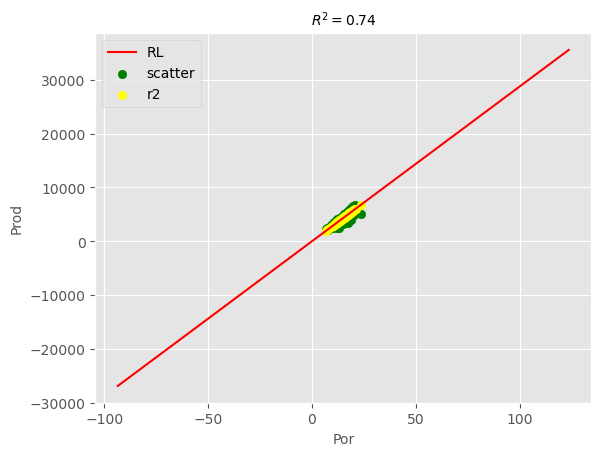

In [48]:
def get_linear_line(xlbl,ylbl,title):
    x_max = np.max(X)+100
    x_min = np.min(X)-100
    #calculatING the line va;ue of x and y 
    #x_max is starting point and x_min is ending point number of items = 1000 or 100 or 50
    x = np.linspace(x_max, x_min, 1000)
    y_intercept = m*x + c 
    #this is for line
    plt.plot(x,y_intercept,color='red', label="RL")
    
    plt.scatter(df['Por'],df['Prod'],color='Green',label='scatter')
    plt.scatter(X_re,Y_pred,color='yellow',label='r2')
    plt.xlabel(xlbl, fontsize=10)
    plt.ylabel(ylbl,fontsize=10)
    plt.title(title % r2, fontsize=10)
    plt.legend()
    plt.show()
get_linear_line('Por','Prod',title=('$R^2= %.2f$'))